# Front Matter: CASA0007 Quantitative Methods

## Title: Assessment 3 - Written Investigation

### Student ID: 21203086 


# Reproducible Analysis

## Introduction-overview

This notebook holds the analysis for the 
After a first exploration of the datasets with visualisations that seek to quantify the current picture 

Data used for this analysis were obtained from the following sources:
* Online database for the Sustainable Development Report 2021: <https://dashboards.sdgindex.org/static/downloads/files/SDR%202021%20-%20Database.xlsx>
* education data : <https://stats.oecd.org/viewhtml.aspx?datasetcode=EAG_NEAC&lang=en>
* world map: <https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip>



## Libraries

In [1]:
# import the main libraries
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

## Data import

### World Map

Download and load in the shapefile for the world map to be used for visualisations

<AxesSubplot:>

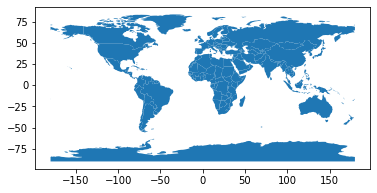

In [2]:
#load in the downloaded shapefile 
world = gpd.read_file("Data/geo/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.plot()

In [3]:
world.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [4]:
# print the column list to find a suitable column for joining later with the csv files
column_list= world.columns.values
column_list

array(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF',
       'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF',
       'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV',
       'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0',
       'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8',
       'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR',
       'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2',
       'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3',
       'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS',
       'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES',
       'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP',
       'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR',
       'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG',
       'ADM0_A3_MA', 'ADM0_A3_PT',

In [157]:
# the ISO code will be used for joining 
world['ADM0_A3']

0      FJI
1      TZA
2      SAH
3      CAN
4      USA
      ... 
172    SRB
173    MNE
174    KOS
175    TTO
176    SDS
Name: ADM0_A3, Length: 177, dtype: object

In [156]:
#print(df2_info.index.values)
print(world['ADM0_A3'].tolist())

['FJI', 'TZA', 'SAH', 'CAN', 'USA', 'KAZ', 'UZB', 'PNG', 'IDN', 'ARG', 'CHL', 'COD', 'SOM', 'KEN', 'SDN', 'TCD', 'HTI', 'DOM', 'RUS', 'BHS', 'FLK', 'NOR', 'GRL', 'ATF', 'TLS', 'ZAF', 'LSO', 'MEX', 'URY', 'BRA', 'BOL', 'PER', 'COL', 'PAN', 'CRI', 'NIC', 'HND', 'SLV', 'GTM', 'BLZ', 'VEN', 'GUY', 'SUR', 'FRA', 'ECU', 'PRI', 'JAM', 'CUB', 'ZWE', 'BWA', 'NAM', 'SEN', 'MLI', 'MRT', 'BEN', 'NER', 'NGA', 'CMR', 'TGO', 'GHA', 'CIV', 'GIN', 'GNB', 'LBR', 'SLE', 'BFA', 'CAF', 'COG', 'GAB', 'GNQ', 'ZMB', 'MWI', 'MOZ', 'SWZ', 'AGO', 'BDI', 'ISR', 'LBN', 'MDG', 'PSX', 'GMB', 'TUN', 'DZA', 'JOR', 'ARE', 'QAT', 'KWT', 'IRQ', 'OMN', 'VUT', 'KHM', 'THA', 'LAO', 'MMR', 'VNM', 'PRK', 'KOR', 'MNG', 'IND', 'BGD', 'BTN', 'NPL', 'PAK', 'AFG', 'TJK', 'KGZ', 'TKM', 'IRN', 'SYR', 'ARM', 'SWE', 'BLR', 'UKR', 'POL', 'AUT', 'HUN', 'MDA', 'ROU', 'LTU', 'LVA', 'EST', 'DEU', 'BGR', 'GRC', 'TUR', 'ALB', 'HRV', 'CHE', 'LUX', 'BEL', 'NLD', 'PRT', 'ESP', 'IRL', 'NCL', 'SLB', 'NZL', 'AUS', 'LKA', 'CHN', 'TWN', 'ITA', 'DNK'

In [6]:
#check the crs
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

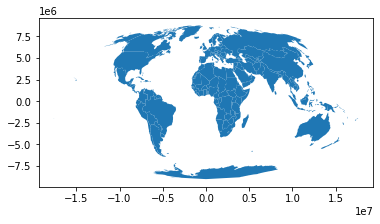

In [7]:
# change projection (optional)
world = world.to_crs("+proj=moll +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
world.plot()

### SDG data

In [42]:
# Load in the data 
df = pd.read_excel('https://dashboards.sdgindex.org/static/downloads/files/SDR%202021%20-%20Database.xlsx?raw=true', sheet_name="Raw Data")
df.head(3)

,Country Code ISO3,Country,Regions used for the SDG Index & Dashboard,Population in 2020,Poverty headcount ratio at $1.90/day (%),Poverty headcount ratio at $3.20/day (%),Poverty rate after taxes and transfers (%),Prevalence of undernourishment (%),Prevalence of stunting in children under 5 years of age (%),Prevalence of wasting in children under 5 years of age (%),...,Press Freedom Index (best 0-100 worst),Access to and affordability of justice (worst 0–1 best),"Persons held in prison (per 100,000 population)",Government spending on health and education (% of GDP),For high-income and all OECD DAC countries: International concessional public fi,Other countries: Government revenue excluding grants (% of GDP),Corporate Tax Haven Score (best 0-100 worst),Financial Secrecy Score (best 0-100 worst),Shifted profits of multinationals (US$ billion),Statistical Performance Index (worst 0-100 best)
0,AFG,Afghanistan,E. Europe & C. Asia,38928341.0,NaN,NaN,NaN,29.9,38.2,5.1,...,37.70,0.487,NaN,4.545,NaN,13.039,0.0,NaN,NaN,49.756
1,ALB,Albania,E. Europe & C. Asia,2877800.0,0.16,8.50,NaN,3.6,11.3,1.6,...,30.25,0.532,NaN,6.453,NaN,25.343,0.0,NaN,NaN,75.383
2,DZA,Algeria,MENA,43851043.0,0.37,2.89,NaN,2.8,11.7,4.1,...,45.52,0.550,NaN,8.431,NaN,40.424,0.0,NaN,NaN,55.149


In [43]:
# size of dataframe
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 193 x 125


In [44]:
# extract the column names
cols=df.columns
print(cols)
print()
print(f"The dataset has {len(cols)} columns")

Index(['Country Code ISO3', 'Country',
       'Regions used for the SDG Index & Dashboard', 'Population in 2020',
       'Poverty headcount ratio at $1.90/day (%)',
       'Poverty headcount ratio at $3.20/day (%)',
       'Poverty rate after taxes and transfers (%)',
       'Prevalence of undernourishment (%)',
       'Prevalence of stunting in children under 5 years of age (%)',
       'Prevalence of wasting in children under 5 years of age (%)',
       ...
       'Press Freedom Index (best 0-100 worst)',
       'Access to and affordability of justice (worst 0–1 best)',
       'Persons held in prison (per 100,000 population)',
       'Government spending on health and education (% of GDP)',
       'For high-income and all OECD DAC countries: International concessional public fi',
       'Other countries: Government revenue excluding grants (% of GDP)',
       'Corporate Tax Haven Score (best 0-100 worst)',
       'Financial Secrecy Score (best 0-100 worst)',
       'Shifted profits o

In [45]:
# store the columns of interest in a list
sub_cols=["Country", "Country Code ISO3",
          "Adolescent fertility rate (births per 1,000 females aged 15 to 19)",
          "Subjective well-being (average ladder score, worst 0-10 best)",
          "Literacy rate (% of population aged 15 to 24)",
          "Tertiary educational attainment (% of population aged 25 to 34)",
          "Demand for family planning satisfied by modern methods (% of females aged 15 to ",
          "Ratio of female-to-male mean years of education received (%)",
          "Seats held by women in national parliament (%)",
          "Gender wage gap (% of male median wage)",
          "CO₂ emissions from fuel combustion for electricity and heating per total electri",
          "Unemployment rate (% of total labor force)",
          "Gini coefficient adjusted for top income",
          "Palma ratio",
          "Government spending on health and education (% of GDP)",
          "Female share of graduates from STEM fields at the tertiary level (%)",
          'Poverty rate after taxes and transfers (%)', 
          'Press Freedom Index (best 0-100 worst)'
          ]
# create a subframe with the stored columns
df = df[sub_cols]

In [46]:
# change settings to display all rows
pd.set_option('display.max_rows', None)
# investigate NA values by printing out the count of NA values per column 
df.isna().sum().sort_values(ascending=False)

Female share of graduates from STEM fields at the tertiary level (%)                158
Poverty rate after taxes and transfers (%)                                          157
Gender wage gap (% of male median wage)                                             156
Tertiary educational attainment (% of population aged 25 to 34)                     156
CO₂ emissions from fuel combustion for electricity and heating per total electri     53
Palma ratio                                                                          40
Literacy rate (% of population aged 15 to 24)                                        37
Subjective well-being (average ladder score, worst 0-10 best)                        33
Gini coefficient adjusted for top income                                             32
Ratio of female-to-male mean years of education received (%)                         22
Press Freedom Index (best 0-100 worst)                                               19
Unemployment rate (% of total la

In [47]:
# change settings back 
pd.reset_option('all')

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [48]:
#df.set_index('Country', inplace=True)
df.head()

,Country,Country Code ISO3,"Adolescent fertility rate (births per 1,000 females aged 15 to 19)","Subjective well-being (average ladder score, worst 0-10 best)",Literacy rate (% of population aged 15 to 24),Tertiary educational attainment (% of population aged 25 to 34),Demand for family planning satisfied by modern methods (% of females aged 15 to,Ratio of female-to-male mean years of education received (%),Seats held by women in national parliament (%),Gender wage gap (% of male median wage),CO₂ emissions from fuel combustion for electricity and heating per total electri,Unemployment rate (% of total labor force),Gini coefficient adjusted for top income,Palma ratio,Government spending on health and education (% of GDP),Female share of graduates from STEM fields at the tertiary level (%),Poverty rate after taxes and transfers (%),Press Freedom Index (best 0-100 worst)
0,Afghanistan,AFG,65.141,2.4,65.421,NaN,42.2,31.667,27.016,NaN,NaN,11.73,NaN,NaN,4.545,NaN,NaN,37.70
1,Albania,ALB,19.572,5.4,99.330,NaN,6.3,91.509,29.508,NaN,0.508,11.70,41.682,1.272,6.453,NaN,NaN,30.25
2,Algeria,DZA,9.834,4.7,97.427,NaN,77.2,92.771,25.758,NaN,1.905,12.83,31.522,0.991,8.431,NaN,NaN,45.52
3,Andorra,AND,NaN,NaN,NaN,NaN,NaN,98.113,46.429,NaN,NaN,NaN,NaN,NaN,7.710,NaN,NaN,23.23
4,Angola,AGO,147.958,3.8,77.431,NaN,29.8,62.500,30.000,NaN,1.609,7.70,45.075,3.443,4.490,NaN,NaN,33.92


### First dataset exploration

In [49]:
# check the datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 18 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Country                                                                           193 non-null    object 
 1   Country Code ISO3                                                                 193 non-null    object 
 2   Adolescent fertility rate (births per 1,000 females aged 15 to 19)                183 non-null    float64
 3   Subjective well-being (average ladder score, worst 0-10 best)                     160 non-null    float64
 4   Literacy rate (% of population aged 15 to 24)                                     156 non-null    float64
 5   Tertiary educational attainment (% of population aged 25 to 34)                   37 non-null     float64
 6   De

After the first inspection of the data the key things to note are: 
* Many NA values in key fields 
* All are floats, no need for converting
* Standardised data(percentages, ratios etc)

In [50]:
#subset the countries with no info for higher education  
df_no_info= df[df["Tertiary educational attainment (% of population aged 25 to 34)"].isna()]
df_no_info

,Country,Country Code ISO3,"Adolescent fertility rate (births per 1,000 females aged 15 to 19)","Subjective well-being (average ladder score, worst 0-10 best)",Literacy rate (% of population aged 15 to 24),Tertiary educational attainment (% of population aged 25 to 34),Demand for family planning satisfied by modern methods (% of females aged 15 to,Ratio of female-to-male mean years of education received (%),Seats held by women in national parliament (%),Gender wage gap (% of male median wage),CO₂ emissions from fuel combustion for electricity and heating per total electri,Unemployment rate (% of total labor force),Gini coefficient adjusted for top income,Palma ratio,Government spending on health and education (% of GDP),Female share of graduates from STEM fields at the tertiary level (%),Poverty rate after taxes and transfers (%),Press Freedom Index (best 0-100 worst)
0,Afghanistan,AFG,65.141,2.4,65.421,NaN,42.2,31.667,27.016,NaN,NaN,11.73,NaN,NaN,4.545,NaN,NaN,37.70
1,Albania,ALB,19.572,5.4,99.330,NaN,6.3,91.509,29.508,NaN,0.508,11.70,41.682,1.272,6.453,NaN,NaN,30.25
2,Algeria,DZA,9.834,4.7,97.427,NaN,77.2,92.771,25.758,NaN,1.905,12.83,31.522,0.991,8.431,NaN,NaN,45.52
3,Andorra,AND,NaN,NaN,NaN,NaN,NaN,98.113,46.429,NaN,NaN,NaN,NaN,NaN,7.710,NaN,NaN,23.23
4,Angola,AGO,147.958,3.8,77.431,NaN,29.8,62.500,30.000,NaN,1.609,7.70,45.075,3.443,4.490,NaN,NaN,33.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,"Venezuela, RB",VEN,84.979,5.1,98.760,NaN,82.0,106.000,22.156,NaN,1.165,9.14,55.329,NaN,8.579,NaN,NaN,45.66
189,Vietnam,VNM,29.152,5.5,98.408,NaN,69.6,93.023,26.721,NaN,0.982,2.27,35.621,1.478,6.864,NaN,NaN,74.71
190,"Yemen, Rep.",YEM,59.162,4.2,77.000,NaN,40.5,56.863,0.332,NaN,2.342,13.42,49.027,1.564,5.649,NaN,NaN,58.25
191,Zambia,ZMB,118.305,4.8,92.092,NaN,65.9,76.829,16.766,NaN,0.419,12.17,62.669,4.989,6.547,NaN,NaN,37.00


In [51]:
print(df_no_info["Country"].tolist())

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia, The', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea, Dem. Rep.', 'Kuwait', 'Kyrgyz Republic', 'Lao PDR', 'Lebanon', 'Lesotho', 'Liberi

In [52]:
# first remove the rows(countries) with NA values
df_info = df.dropna(axis=0, how="any")
print(df_info.index.values)


[ 34  45  55  66  74  82  90  94 100 111 138 139 154 159 177]


Very few countries have information on the selected variables which would not lead to a meaningful investigation. Therefore we will filter again the dataset based on fewer variables.
The variables selected attempt to capture key social indicators as factors influencing the percentage of women pursuing higher education:

* Poverty rate
* Demand for family planning satisfied with modern methods (mDFPS)
* Gender wage gap (% of male median wage)
* Unemployment rate
* Government spending on health and education
* Press Freedom Index (best 0-100 worst)

In [73]:
# store the columns of interest in a list
sub_cols2=["Country", 
           "Country Code ISO3",
           "Poverty rate after taxes and transfers (%)",
           "Demand for family planning satisfied by modern methods (% of females aged 15 to ",
           "Gender wage gap (% of male median wage)",
           "Unemployment rate (% of total labor force)",
           "Government spending on health and education (% of GDP)",
           "Press Freedom Index (best 0-100 worst)"]

# create a subframe with the stored columns
df2= df[sub_cols2]

#rename column names
df2.rename(columns = {'Poverty rate after taxes and transfers (%)':'Poverty rate',
                            'Demand for family planning satisfied by modern methods (% of females aged 15 to ':'mDFPS',
                            'Gender wage gap (% of male median wage)':"Gender wage gap",
                            'Unemployment rate (% of total labor force)': 'Unemployment',
                            'Government spending on health and education (% of GDP)':'GPD education',
                            'Press Freedom Index (best 0-100 worst)': "Press censorship"
                    }, inplace = True)

#df2.set_index('Country', inplace=True)
df2.head()


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Country,Country Code ISO3,Poverty rate,mDFPS,Gender wage gap,Unemployment,GPD education,Press censorship
0,Afghanistan,AFG,NaN,42.2,NaN,11.73,4.545,37.70
1,Albania,ALB,NaN,6.3,NaN,11.70,6.453,30.25
2,Algeria,DZA,NaN,77.2,NaN,12.83,8.431,45.52
3,Andorra,AND,NaN,NaN,NaN,NaN,7.710,23.23
4,Angola,AGO,NaN,29.8,NaN,7.70,4.490,33.92


In [74]:
# first remove the rows(countries) with NA values
df2_info = df2.dropna(axis=0, how="any")

In [75]:
#print(df2_info.index.values)
print(df2_info["Country"].tolist())

['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea, Rep.', 'Latvia', 'Lithuania', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States']


In [76]:
# size of dataframe
print(f"Data frame is {df2_info.shape[0]:,} x {df2_info.shape[1]}")

Data frame is 34 x 8


In [77]:
# investigate NA values by printing out the count of NA values per column 
df2_info.isnull().sum().sort_values(ascending=False)

Country              0
Country Code ISO3    0
Poverty rate         0
mDFPS                0
Gender wage gap      0
Unemployment         0
GPD education        0
Press censorship     0
dtype: int64

The dataframe for analysis has now a total of 34 countries, which is still a relatively small sample but perhaps enough for the following analysis

### Education info

In [199]:
# Load in the data 
edu = pd.read_excel("Data/raw/education_data.xlsx", sheet_name="OECD.Stat export", header=7, skipfooter=7)
edu.head(10)

,ISCED 2011 A education level,Unnamed: 1,Unnamed: 2,Unnamed: 3,Below upper secondary education,Unnamed: 5,Below upper secondary education.1,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Tertiary education,Unnamed: 23,Tertiary education.1,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,NaN,NaN,NaN,NaN,NaN,Less than primary education,NaN,Primary education,NaN,...,NaN,NaN,Short-cycle tertiary education,NaN,Bachelor’s or equivalent education,NaN,Master’s or equivalent education,NaN,Doctoral or equivalent education,NaN
1,Measure,NaN,NaN,NaN,Value,SE,Value,SE,Value,SE,...,Value,SE,Value,SE,Value,SE,Value,SE,Value,SE
2,Country,NaN,Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Australia,NaN,"Percentage, 2020",NaN,16.298603,0.324406,0,0,3.153098,0.153482,...,54.412212,0.437441,13.102977,0.29637,30.855103,0.405687,8.871507,0.249731,1.582625,0.109616
4,Austria,NaN,"Percentage, 2020",NaN,16.9282,0.167495,..,..,1.098733,0.04656,...,34.013531,0.211603,13.665793,0.153418,5.237334,0.099504,14.043162,0.155182,1.06724,0.045895
5,Belgium,NaN,"Percentage, 2020",NaN,18.701988,0.193475,2.517085,0.077724,4.093136,0.098309,...,46.957001,0.247631,0.832893,0.045094,27.869328,0.222466,17.767202,0.189659,0.487576,0.034562
6,Canada,NaN,"Percentage, 2020",NaN,6.248758,..,..,..,1.758395,..,...,66.451424,..,28.968805,..,25.829525,..,11.65309,..,..,..
7,Chile,NaN,"Percentage, 2017",NaN,32.452843,0.193342,7.160082,0.106469,5.330394,0.092764,...,25.628315,0.180285,9.428301,0.120673,14.663694,0.146078,1.53632,0.05079,..,..
8,Colombia,NaN,"Percentage, 2020",NaN,38.924721,0.117054,..,..,..,..,...,27.101116,0.106707,..,..,27.101116,0.106707,..,..,..,..
9,Costa Rica,NaN,"Percentage, 2020",NaN,55.552193,0.638954,10.724995,0.397885,25.792068,0.562552,...,26.449753,0.567149,6.59643,0.319176,16.889963,0.481765,2.847715,0.213879,..,..


In [200]:
# filter out the columns needed
high_edu = edu[["ISCED 2011 A education level","Tertiary education"]]

In [201]:
high_edu.head()

,ISCED 2011 A education level,Tertiary education
0,NaN,NaN
1,Measure,Value
2,Country,NaN
3,Australia,54.412212
4,Austria,34.013531


In [202]:
high_edu.tail(13)

,ISCED 2011 A education level,Tertiary education
39,United Kingdom,51.790306
40,United States,53.423653
41,OECD - Average,42.041134
42,European Union 22 members in OECD,41.402802
43,G20,34.765573
44,Non-OECD Economies,39.529755
45,NaN,23.052433
46,NaN,8.562923
47,NaN,9.837578
48,NaN,13.308873


In [203]:
# drop the unneccssary rows
high_edu.drop(high_edu.index[41:52], inplace=True)
high_edu.tail()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ISCED 2011 A education level,Tertiary education
36,Sweden,52.181118
37,Switzerland,42.166286
38,Turkey,20.753014
39,United Kingdom,51.790306
40,United States,53.423653


In [204]:
# drop the unnecessary rows
high_edu.drop(high_edu.index[0:3], inplace=True)
high_edu.head()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ISCED 2011 A education level,Tertiary education
3,Australia,54.412212
4,Austria,34.013531
5,Belgium,46.957001
6,Canada,66.451424
7,Chile,25.628315


In [209]:
#rename column names
high_edu.rename(columns = {'ISCED 2011 A education level':'Country_name', 
                           'Tertiary education':'Women higher educ'}, inplace = True)


/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:5034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [210]:
# investigate NA values by printing out the count of NA values per column 
high_edu.isna().sum().sort_values(ascending=False)

Country_name         0
Women higher educ    0
dtype: int64

In [211]:
# check the name of Korea
high_edu.head(34)

,Country_name,Women higher educ
3,Australia,54.412212
4,Austria,34.013531
5,Belgium,46.957001
6,Canada,66.451424
7,Chile,25.628315
8,Colombia,27.101116
9,Costa Rica,26.449753
10,Czech Republic,27.334427
11,Denmark,45.869457
12,Estonia,52.436687


In [212]:
#change country name for Korea, assuming it is South Korea
high_edu.at[23,'Country_name']="Korea, Rep."

In [213]:
high_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 3 to 40
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country_name       38 non-null     object
 1   Women higher educ  38 non-null     object
dtypes: object(2)
memory usage: 1.9+ KB


In [214]:
high_edu['Women higher educ']=high_edu['Women higher educ'].astype('float')

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [215]:
high_edu.describe()

,Women higher educ
count,38.000000
mean,42.041134
std,11.783185
min,18.965326
25%,31.946599
50%,43.296684
75%,52.083415
max,66.451424


## join the data

In [216]:
# merge 
df_merged = pd.merge( df2_info, high_edu ,left_on = "Country", right_on = "Country_name", how = "left").drop(columns=["Country_name"])
df_merged.head()

,Country,Country Code ISO3,Poverty rate,mDFPS,Gender wage gap,Unemployment,GPD education,Press censorship,Women higher educ
0,Australia,AUS,12.4,85.6,11.7,6.61,11.537,20.21,54.412212
1,Austria,AUT,9.4,88.0,14.9,5.77,12.905,15.78,34.013531
2,Belgium,BEL,8.2,90.1,4.2,6.01,14.232,12.57,46.957001
3,Canada,CAN,11.8,90.9,17.6,9.48,13.205,15.29,66.451424
4,Chile,CHL,16.5,84.8,12.5,11.51,10.066,27.31,25.628315


In [217]:
# investigate NA values by printing out the count of NA values per column 
df_merged.isna().sum().sort_values(ascending=False)

Country              0
Country Code ISO3    0
Poverty rate         0
mDFPS                0
Gender wage gap      0
Unemployment         0
GPD education        0
Press censorship     0
Women higher educ    0
dtype: int64

In [218]:
# size of dataframe
print(f"Data frame is {df_merged.shape[0]:,} x {df_merged.shape[1]}")

Data frame is 34 x 9


In [219]:
df_merged.set_index("Country", inplace=True)

df_merged.head(34)

,Country Code ISO3,Poverty rate,mDFPS,Gender wage gap,Unemployment,GPD education,Press censorship,Women higher educ
Country,,,,,,,,
Australia,AUS,12.4,85.6,11.7,6.61,11.537,20.21,54.412212
Austria,AUT,9.4,88.0,14.9,5.77,12.905,15.78,34.013531
Belgium,BEL,8.2,90.1,4.2,6.01,14.232,12.57,46.957001
Canada,CAN,11.8,90.9,17.6,9.48,13.205,15.29,66.451424
Chile,CHL,16.5,84.8,12.5,11.51,10.066,27.31,25.628315
Czech Republic,CZE,6.1,85.7,14.7,2.94,10.178,23.57,27.334427
Denmark,DNK,6.1,87.7,4.9,5.66,16.263,8.13,45.869457
Estonia,EST,16.3,80.3,28.3,6.46,9.894,12.61,52.436687
Finland,FIN,6.5,90.4,18.9,7.83,13.476,7.93,56.023224


In [220]:
df_merged.describe()

,Poverty rate,mDFPS,Gender wage gap,Unemployment,GPD education,Press censorship,Women higher educ
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,11.941176,81.532353,13.376471,6.947353,11.213706,20.474118,42.469541
std,3.902767,8.654609,7.006796,3.400604,2.716963,10.019690,11.709924
min,6.100000,60.100000,4.200000,2.940000,5.942000,7.840000,18.965326
25%,8.600000,77.800000,7.075000,4.565000,9.104250,12.262500,33.249826
50%,11.300000,84.150000,13.100000,5.965000,10.794500,21.675000,43.296684
75%,16.150000,87.925000,17.200000,8.400000,13.276250,23.812500,52.083415
max,17.900000,95.500000,32.500000,16.850000,16.843000,50.020000,66.451424


In [221]:
# group by Borough and drop unnecessary columns, then sort by density so that the barchart can be ordered
df_sorted = df_merged.sort_values("Women higher educ", ascending=False)
df_sorted.head(3)

,Country Code ISO3,Poverty rate,mDFPS,Gender wage gap,Unemployment,GPD education,Press censorship,Women higher educ
Country,,,,,,,,
Canada,CAN,11.8,90.9,17.6,9.48,13.205,15.29,66.451424
Finland,FIN,6.5,90.4,18.9,7.83,13.476,7.93,56.023224
Israel,ISR,16.9,68.3,22.7,4.61,10.956,30.84,55.079689


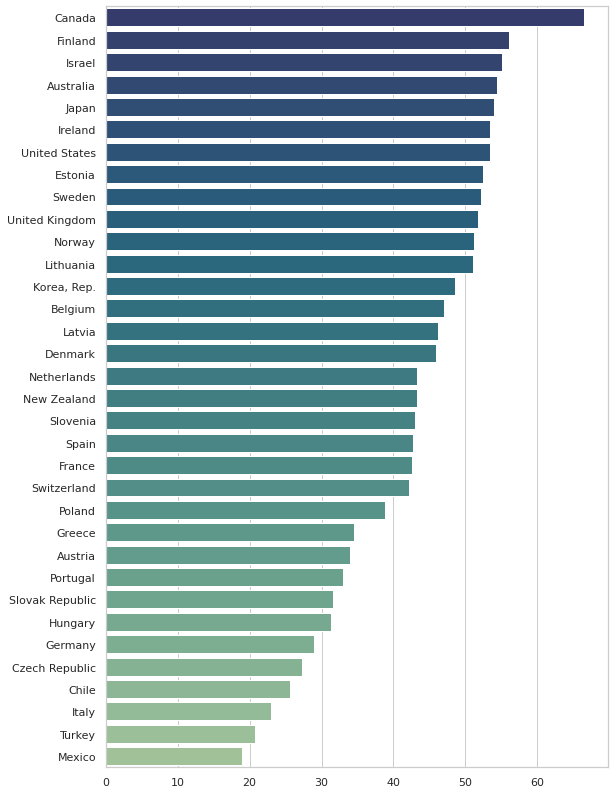

In [222]:
# create bar chart

sns.set(style="whitegrid")
#sns.set_theme(style='darkgrid')
plt.figure(figsize=(9, 14))

ax = sns.barplot( x="Women higher educ",
                  y=df_sorted.index.values, 
                 #hue="room_type",
                  data=df_sorted,
                  order = df_sorted.index.values,
                  palette="crest_r")

#plt.xlabel("Airbnb Listings Density per Borough (1/ha)", size=14)
plt.xlabel(None)
plt.ylabel(None)

plt.savefig("Percentage of Women with higher education.png", bbox_inches = 'tight')

In [223]:
# merge with the world data to make a map
world_joined = pd.merge(world, df_merged ,left_on = 'ADM0_A3', right_on = "Country Code ISO3", how="outer")

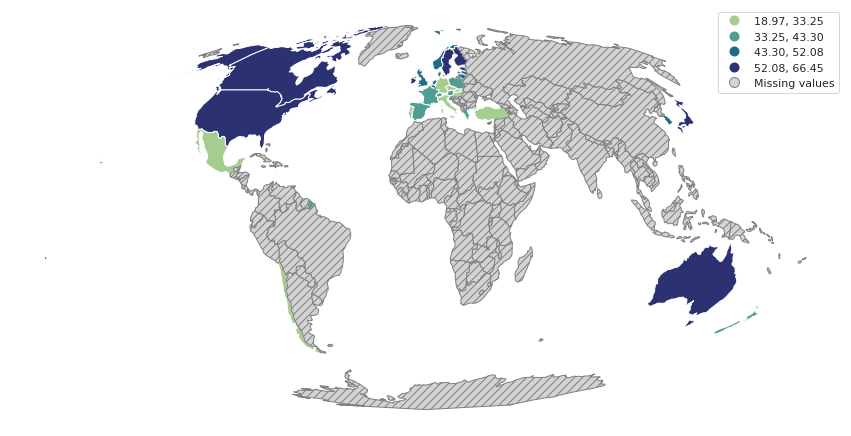

In [224]:

ax = world_joined.plot(column="Women higher educ",
           legend=True,
           scheme="quantiles",
           k=4,
           cmap="crest",
           figsize=(15, 10),
           missing_kwds={"color": "lightgrey",
                         "edgecolor": "grey",
                         "hatch": "///",
                         "label": "Missing values",},)

ax.set_axis_off();
plt.savefig("Women with higher education(%)_map.png", bbox_inches = 'tight')

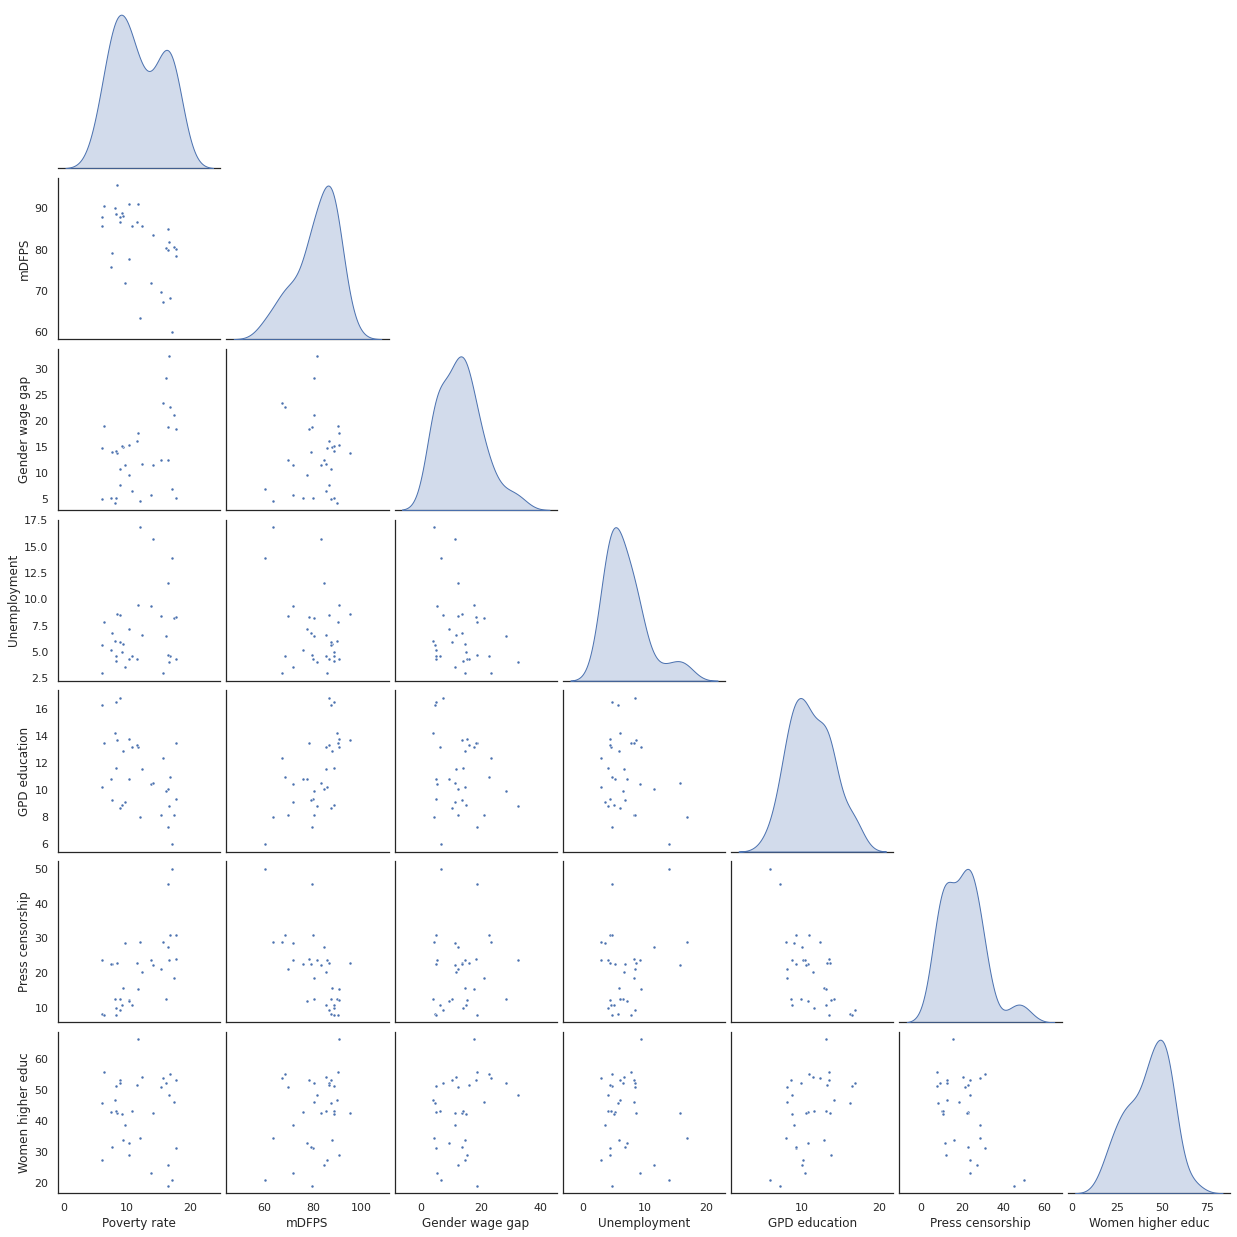

In [225]:
# using a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=df_merged, markers=".", diag_kind='kde', corner=True)

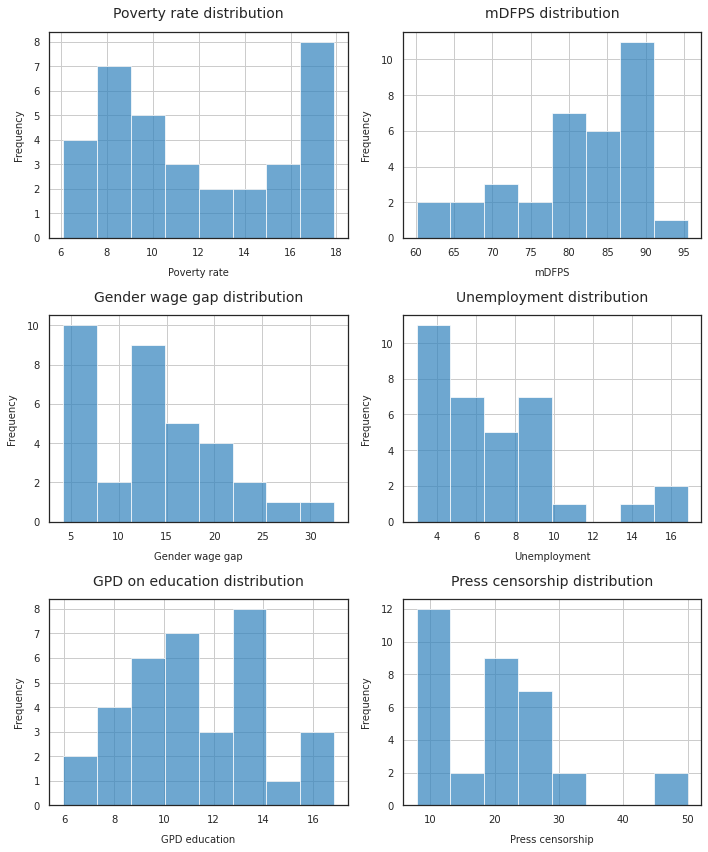

<Figure size 432x288 with 0 Axes>

In [226]:
# code below from Philip Wilkinson : https://github.com/PhilipDW183/Convenience_store/blob/main/Convenience%20store%20exploration.ipynb

#set the columns we are interested in
columns = ['Poverty rate',
           'mDFPS', 
           'Gender wage gap', 
           'Unemployment',
           'GPD education', 
           'Press censorship'
          ]

#set the histogram titles
hist_titles = ["Poverty rate distribution",
              "mDFPS distribution",
              "Gender wage gap distribution",
              "Unemployment distribution",
              "GPD on education distribution",
              "Press censorship distribution"]
#set the acis labels
axis_labels = ['Poverty rate',
           'mDFPS', 
           'Gender wage gap', 
           'Unemployment',
           'GPD education', 
           'Press censorship'
          ]

#create a base axis for the plots
fig, ax = plt.subplots(3,2, figsize = (10,12))
#flatten the axis to make it easy to iteratre over
axis = ax.flatten()

#iterate over each columns using the labels information already set up
for i, col in enumerate(columns):
    
    #create the histogram using the column
    df_merged[col].hist(bins = 8, ax = axis[i],
                                       color = "#3182bd",
                                       alpha = 0.7)
    #add label information
    axis[i].set_title(hist_titles[i], fontsize = 14, pad = 14)
    axis[i].set_ylabel("Frequency", fontsize  =10, labelpad = 10)
    axis[i].set_xlabel(f"{axis_labels[i]}", fontsize = 10, labelpad = 10)
    axis[i].tick_params(axis = "both", labelsize = 10)

#remove the unused axis
#axis[5].set_axis_off()
#keep the layout tight
plt.tight_layout()
#show the plot 
plt.show()

plt.savefig("Variables_histogram.png", bbox_inches = 'tight')

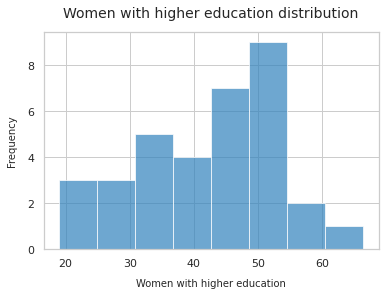

In [227]:
# plot histogram of dependent variable
sns.set_style("whitegrid")
ax=df_merged['Women higher educ'].plot.hist(bins = 8,
                                       color = "#3182bd",
                                       alpha = 0.7)

ax.set_title("Women with higher education distribution", fontsize = 14, pad = 14)
ax.set_ylabel("Frequency", fontsize  =10, labelpad = 10)
ax.set_xlabel("Women with higher education", fontsize = 10, labelpad = 10)

plt.savefig("Dep_Variable_histogram.png", bbox_inches = 'tight')

NOTE: 
most of the distributions are slightly skewed 

<AxesSubplot:>

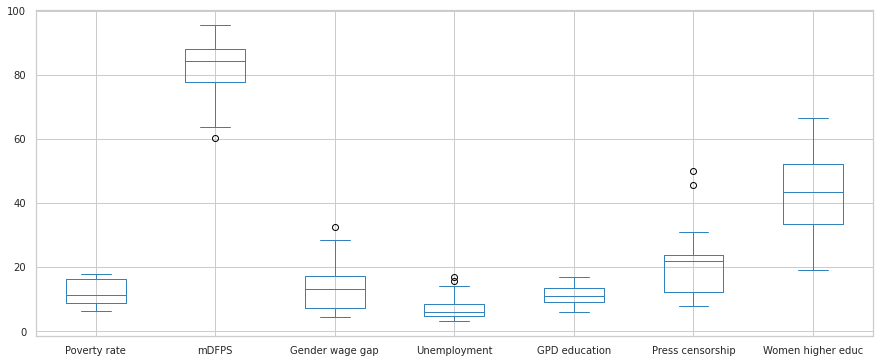

In [229]:
df_merged.boxplot(
            figsize=(15,6),fontsize  =10, color = "#3182bd")

The boxplots show the outliers in mDFPS, gender wage gap, unemployment and press cencorship
the outlier might seriously affect the results (also the scatterplots). Consider removing them?

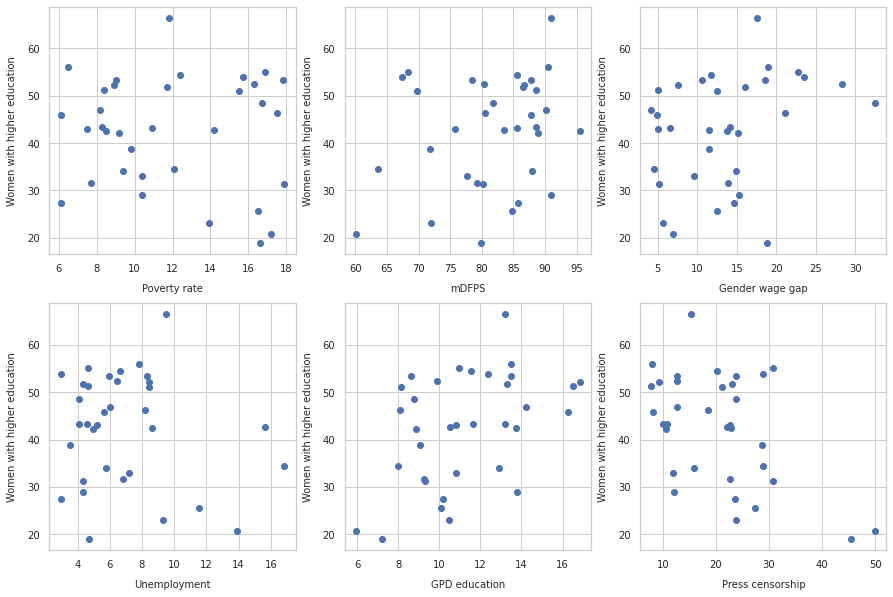

In [228]:

#create a base axis for the plots
fig, ax = plt.subplots(2,3, figsize = (15,10))
#flatten the axis to make it easy to iteratre over
axis = ax.flatten()

#iterate over each columns using the labels information already set up
for i, col in enumerate(columns):
    
    #sns.scatterplot(data=df_merged, x=col, y="Women with tertiary educ perc")
    # plot 
    axis[i].scatter(df_merged[col], df_merged["Women higher educ"]) 
  #  axis[i].set_title(hist_titles[i], fontsize = 18, pad = 18)
    axis[i].set_ylabel("Women with higher education", fontsize  =10, labelpad = 10)
    axis[i].set_xlabel(f"{axis_labels[i]}", fontsize = 10, labelpad = 10)
    axis[i].tick_params(axis = "both", labelsize = 10) 
    
plt.savefig("Scatter_plots.png", bbox_inches = 'tight')

there seems to be no aparent linear relationship between the y and x variables 
Gender wage gap, unemployment and press censorhip seeem to have a curvilinear relationship. 

### normalise data

In [231]:
to_ln = ['Poverty rate',
           'mDFPS', 
           'Gender wage gap', 
           'Unemployment',
         #  'GPD education', 
           'Press censorship',
          'Women higher educ'
          ]

In [232]:
# add a column taking the log 
for col in to_ln:
    df_merged["ln_"+ col] = np.log(df_merged[col])
    


In [233]:
#df_merged["Gender gap2"] = df_merged['Gender wage gap']**2

In [234]:
df_merged

,Country Code ISO3,Poverty rate,mDFPS,Gender wage gap,Unemployment,GPD education,Press censorship,Women higher educ,ln_Poverty rate,ln_mDFPS,ln_Gender wage gap,ln_Unemployment,ln_Press censorship,ln_Women higher educ
Country,,,,,,,,,,,,,,
Australia,AUS,12.4,85.6,11.7,6.61,11.537,20.21,54.412212,2.517696,4.449685,2.459589,1.888584,3.006178,3.996589
Austria,AUT,9.4,88.0,14.9,5.77,12.905,15.78,34.013531,2.240710,4.477337,2.701361,1.752672,2.758743,3.526758
Belgium,BEL,8.2,90.1,4.2,6.01,14.232,12.57,46.957001,2.104134,4.500920,1.435085,1.793425,2.531313,3.849232
Canada,CAN,11.8,90.9,17.6,9.48,13.205,15.29,66.451424,2.468100,4.509760,2.867899,2.249184,2.727199,4.196471
Chile,CHL,16.5,84.8,12.5,11.51,10.066,27.31,25.628315,2.803360,4.440296,2.525729,2.443216,3.307253,3.243698
Czech Republic,CZE,6.1,85.7,14.7,2.94,10.178,23.57,27.334427,1.808289,4.450853,2.687847,1.078410,3.159975,3.308147
Denmark,DNK,6.1,87.7,4.9,5.66,16.263,8.13,45.869457,1.808289,4.473922,1.589235,1.733424,2.095561,3.825799
Estonia,EST,16.3,80.3,28.3,6.46,9.894,12.61,52.436687,2.791165,4.385770,3.342862,1.865629,2.534490,3.959606
Finland,FIN,6.5,90.4,18.9,7.83,13.476,7.93,56.023224,1.871802,4.504244,2.939162,2.057963,2.070653,4.025766


In [235]:
df_norm = df_merged.drop(['Poverty rate',
           'mDFPS', 
           'Gender wage gap', 
           'Unemployment', 
           'Press censorship',
           'Women higher educ'], axis=1)

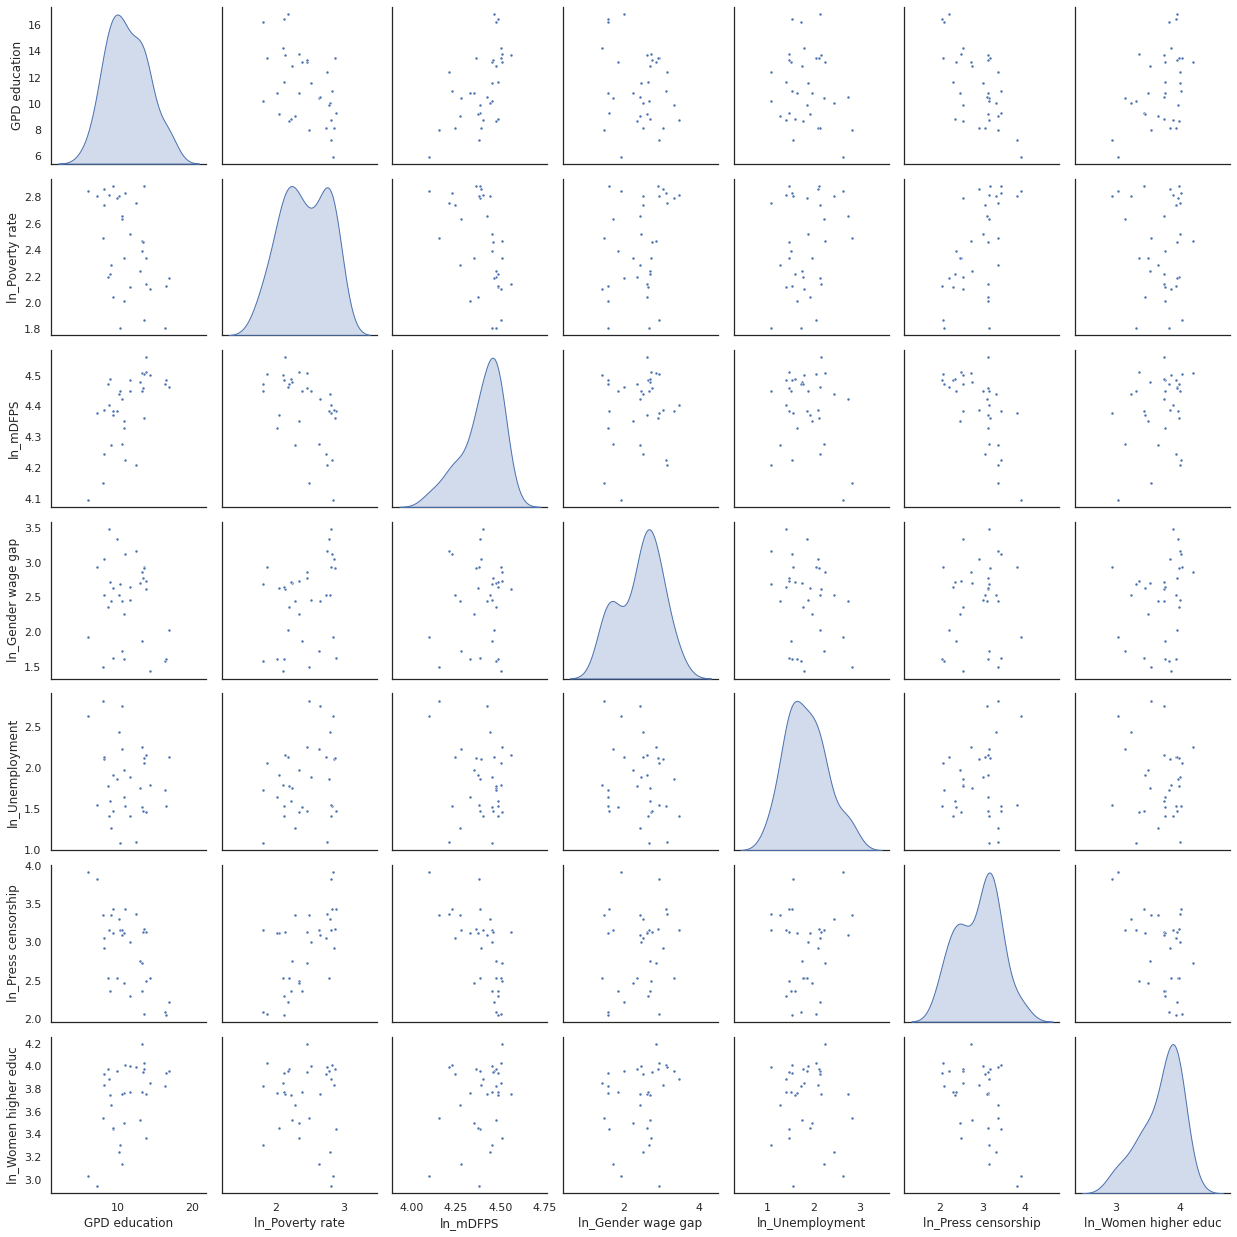

In [236]:
# using a quick plot to visualise the distribution of the variables
sns.set(style="white")
sns.pairplot(data=df_norm , markers=".", diag_kind='kde', corner=False)

## standardise data

In [552]:
#df_stand = df_norm.set_index('Country')

In [237]:
df_norm.columns

Index(['Country Code ISO3', 'GPD education', 'ln_Poverty rate', 'ln_mDFPS',
       'ln_Gender wage gap', 'ln_Unemployment', 'ln_Press censorship',
       'ln_Women higher educ'],
      dtype='object')

In [242]:
columns=['GPD education', 'ln_Poverty rate', 'ln_mDFPS',
       'ln_Gender wage gap', 'ln_Unemployment', 'ln_Press censorship',
       'ln_Women higher educ']

In [246]:
from scipy.stats import zscore
df_stand= df_norm[columns].apply(zscore)

In [556]:
df_stand.head()

,Education spendings,ln_Poverty rate,ln_Contraception,ln_Gender wage gap,ln_Unemployment,ln_Press Freedom,ln_Women with tertiary educ perc
Country,,,,,,,
Australia,0.12,0.28,0.49,0.02,0.11,0.21,0.95
Austria,0.63,-0.55,0.75,0.45,-0.20,-0.30,-0.58
Belgium,1.13,-0.96,0.96,-1.81,-0.11,-0.77,0.47
Canada,0.74,0.13,1.04,0.75,0.95,-0.37,1.60
Chile,-0.43,1.13,0.41,0.14,1.39,0.83,-1.50


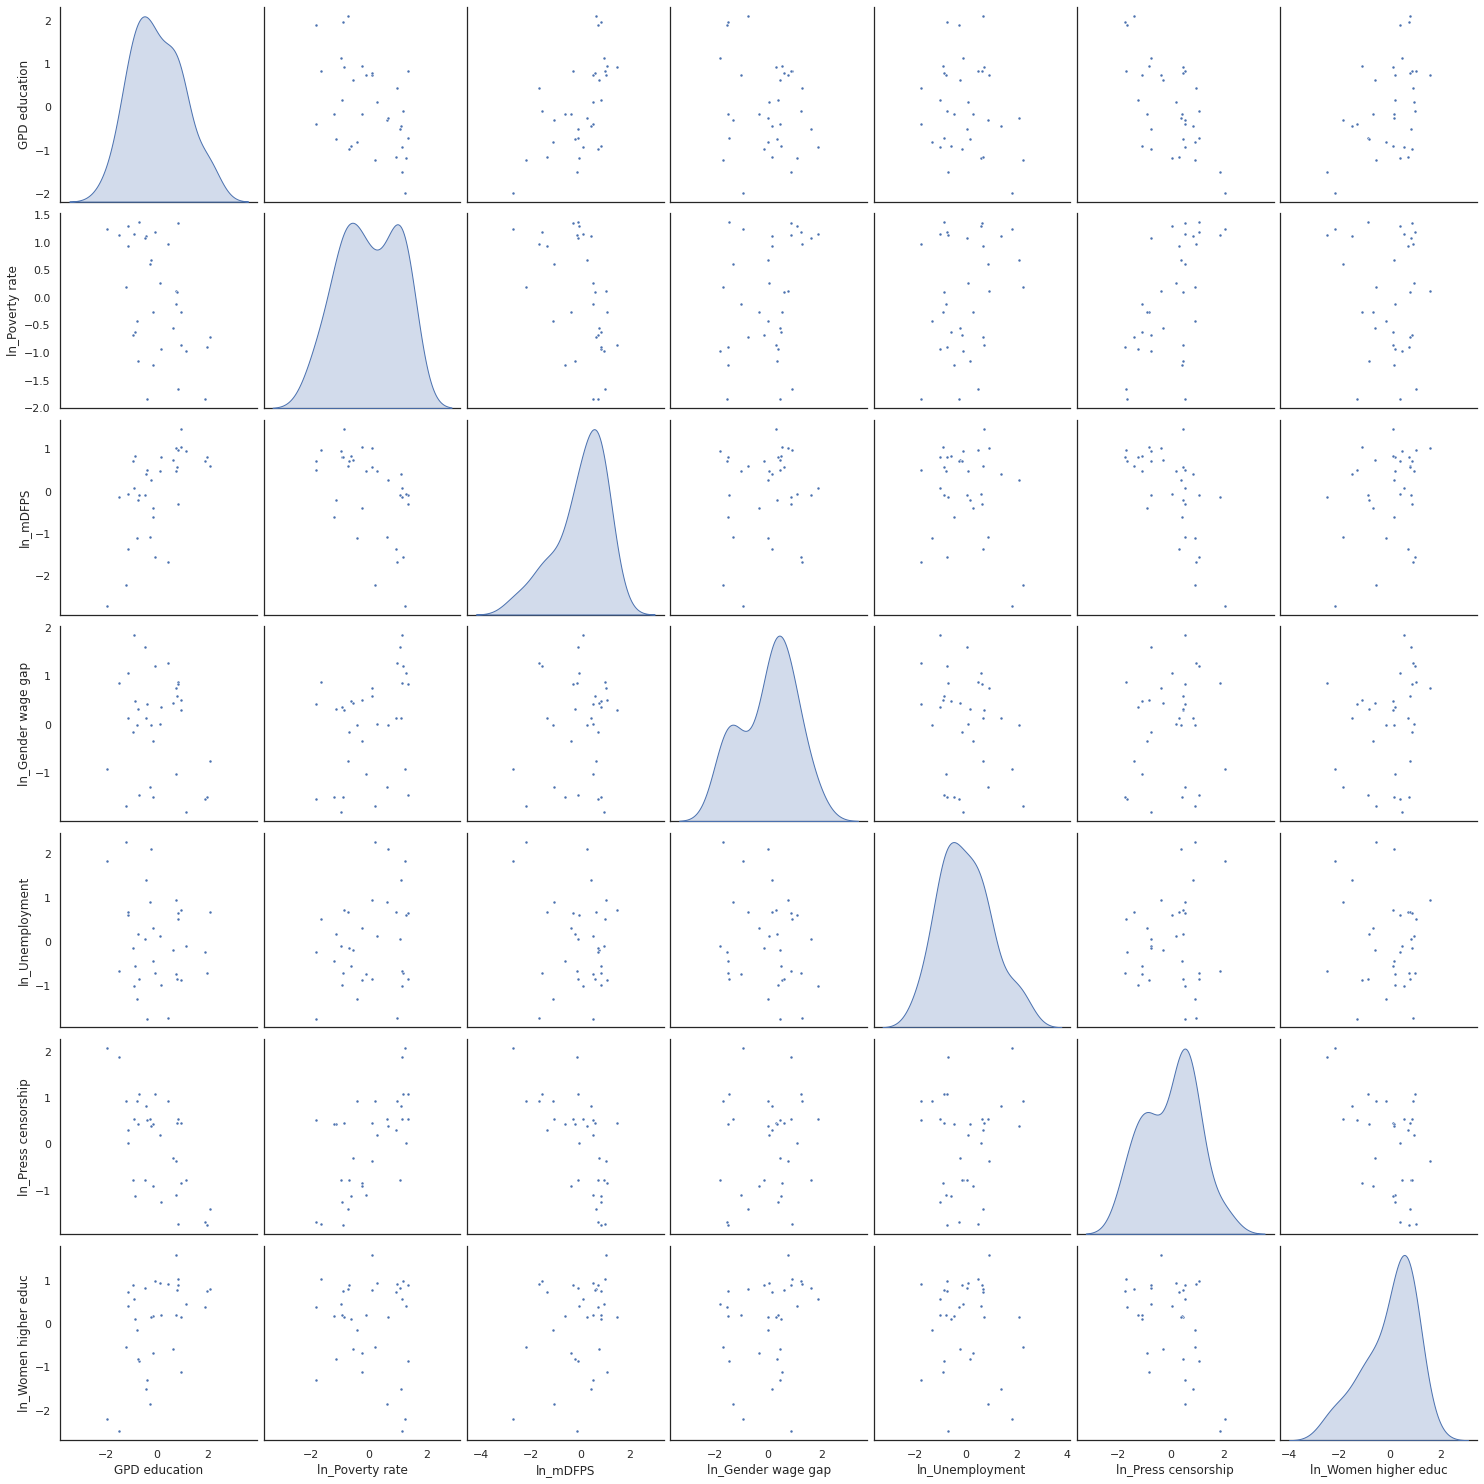

In [247]:
# quick plot to visualise the results
sns.set(style="white")
sns.pairplot(df_stand, markers=".", height=3, diag_kind='kde');

## Cluster analysis

In [290]:
clustA = df_stand

In [291]:
#import the necessary libraries
from sklearn import metrics
from sklearn.cluster import KMeans

#create an empty list
list_SSE = []
#set the range of clusters to evaluate
min_k = 1
max_k = 11
range_k = range(min_k, max_k)

In [292]:
#iterate over the range
for i in range_k:
    #perform the clustering algorithm
    km = KMeans(n_clusters = i,
               init = "random",
               n_init = 10,
               max_iter = 300,
               tol = 1e-04, 
               random_state = 42)
    #fit this to the data
    km.fit(clustA[columns])
    #add the SEE score
    list_SSE.append(km.inertia_)   

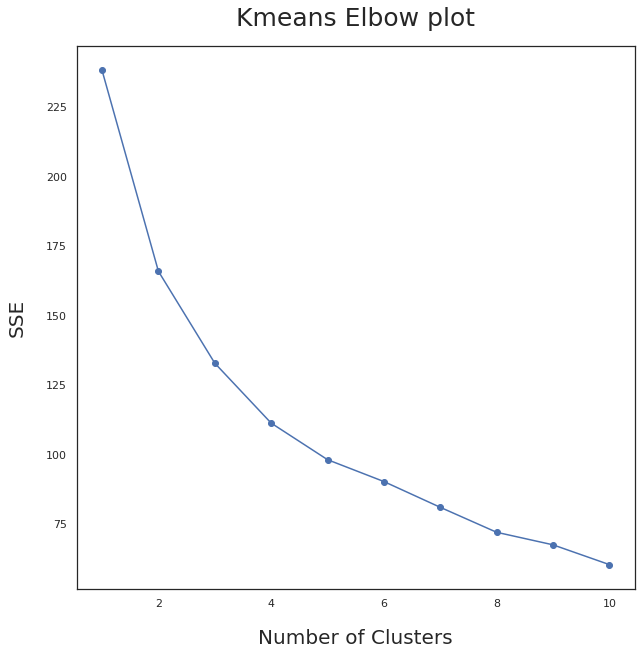

In [293]:


#create the base plots
fig, ax = plt.subplots(1,1, figsize = (10,10))

#add the data to the axis
ax.plot(range_k, list_SSE, marker = "o")

#add the necessary labels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("SSE", fontsize =20, labelpad = 20)
ax.set_title("Kmeans Elbow plot", fontsize = 25, pad = 20)

plt.show()



In [294]:


#for the silhouette score
import random

#create an empty list
silhouette = []

#iteratre over the number of clusters to evaluate
for i in range(2,10):
    
    #create an empty list to hold the averages
    average = []
    #perform the clustering algorithm several times for each number of clusters
    for x in range(1,10):
        #set the number of clusters
        k_cluster = i
        #generate a arandom seed number
        random_seed = random.randint(1,101)
        #apply the KMeans clustering algorithm
        kmeans_method = KMeans(n_clusters = k_cluster,
                              random_state = random_seed)
        kmeans_method.fit(clustA[columns])
        #extract the labels
        labels = kmeans_method.labels_
        #extract the silhouette score
        a = metrics.silhouette_score(clustA[columns], labels)
        #append the result
        average.append(a)
    #clauclate the average silhouette score for each number of clusters 
    silhouette.append(sum(average)/len(average))



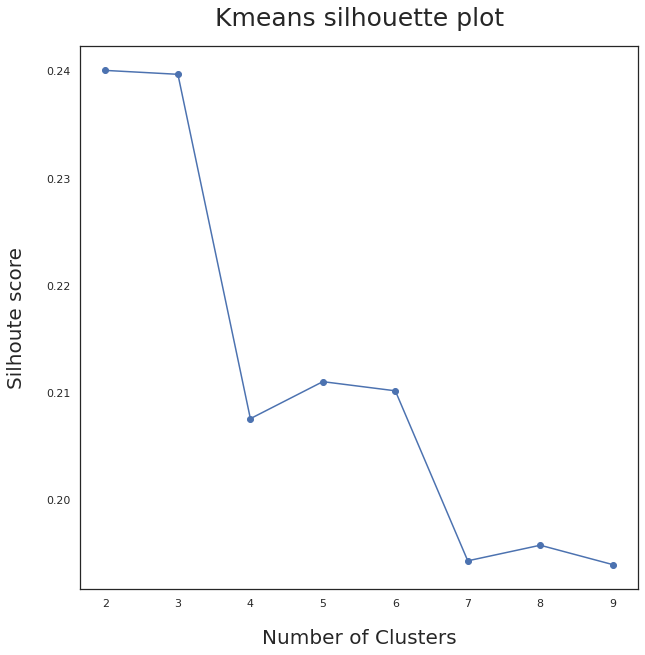

In [295]:
#create a base axis
fig, ax = plt.subplots(1,1, figsize = (10,10))

#plot the results
ax.plot(range(2,10), silhouette, marker = "o")

#add the lbels
ax.set_xlabel("Number of Clusters", fontsize = 20, labelpad = 20)
ax.set_ylabel("Silhoute score", fontsize =20, labelpad = 20)
ax.set_title("Kmeans silhouette plot", fontsize = 25, pad = 20)

plt.show()

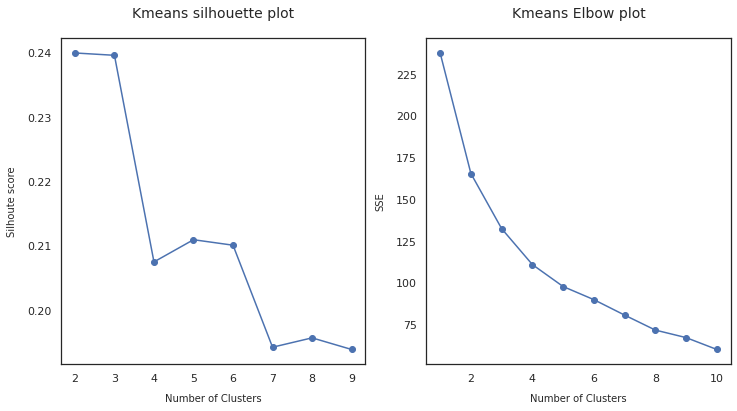

In [296]:
#combine both plots
fig, ax = plt.subplots(1,2, figsize = (12,6))

ax[0].plot(range(2,10), silhouette, marker = "o")
ax[0].set_xlabel("Number of Clusters", fontsize = 10, labelpad = 10)
ax[0].set_ylabel("Silhoute score", fontsize =10, labelpad = 10)
ax[0].set_title("Kmeans silhouette plot", fontsize = 14, pad = 20)

ax[1].plot(range_k, list_SSE, marker = "o")
ax[1].set_xlabel("Number of Clusters", fontsize = 10, labelpad = 10)
ax[1].set_ylabel("SSE", fontsize =10, labelpad = 10)
ax[1].set_title("Kmeans Elbow plot", fontsize = 14, pad = 20)

plt.savefig("Silhouette_elbow_plot.png", bbox_inches = 'tight')

In [313]:
df_merged.head(2)

,Country Code ISO3,Poverty rate,mDFPS,Gender wage gap,Unemployment,GPD education,Press censorship,Women higher educ,ln_Poverty rate,ln_mDFPS,ln_Gender wage gap,ln_Unemployment,ln_Press censorship,ln_Women higher educ,labels
Country,,,,,,,,,,,,,,,
Australia,AUS,12.4,85.6,11.7,6.61,11.537,20.21,54.412212,2.517696,4.449685,2.459589,1.888584,3.006178,3.996589,1
Austria,AUT,9.4,88.0,14.9,5.77,12.905,15.78,34.013531,2.240710,4.477337,2.701361,1.752672,2.758743,3.526758,4


In [314]:
df_stand.head(2)

,GPD education,ln_Poverty rate,ln_mDFPS,ln_Gender wage gap,ln_Unemployment,ln_Press censorship,ln_Women higher educ
Country,,,,,,,
Australia,0.120780,0.275266,0.494433,0.019238,0.113412,0.209414,0.945803
Austria,0.631856,-0.551750,0.745052,0.451700,-0.200374,-0.300249,-0.580871


In [310]:
columns

['GPD education',
 'ln_Poverty rate',
 'ln_mDFPS',
 'ln_Gender wage gap',
 'ln_Unemployment',
 'ln_Press censorship',
 'ln_Women higher educ']

In [316]:
clustA.head(2)

,GPD education,ln_Poverty rate,ln_mDFPS,ln_Gender wage gap,ln_Unemployment,ln_Press censorship,ln_Women higher educ
Country,,,,,,,
Australia,0.120780,0.275266,0.494433,0.019238,0.113412,0.209414,0.945803
Austria,0.631856,-0.551750,0.745052,0.451700,-0.200374,-0.300249,-0.580871


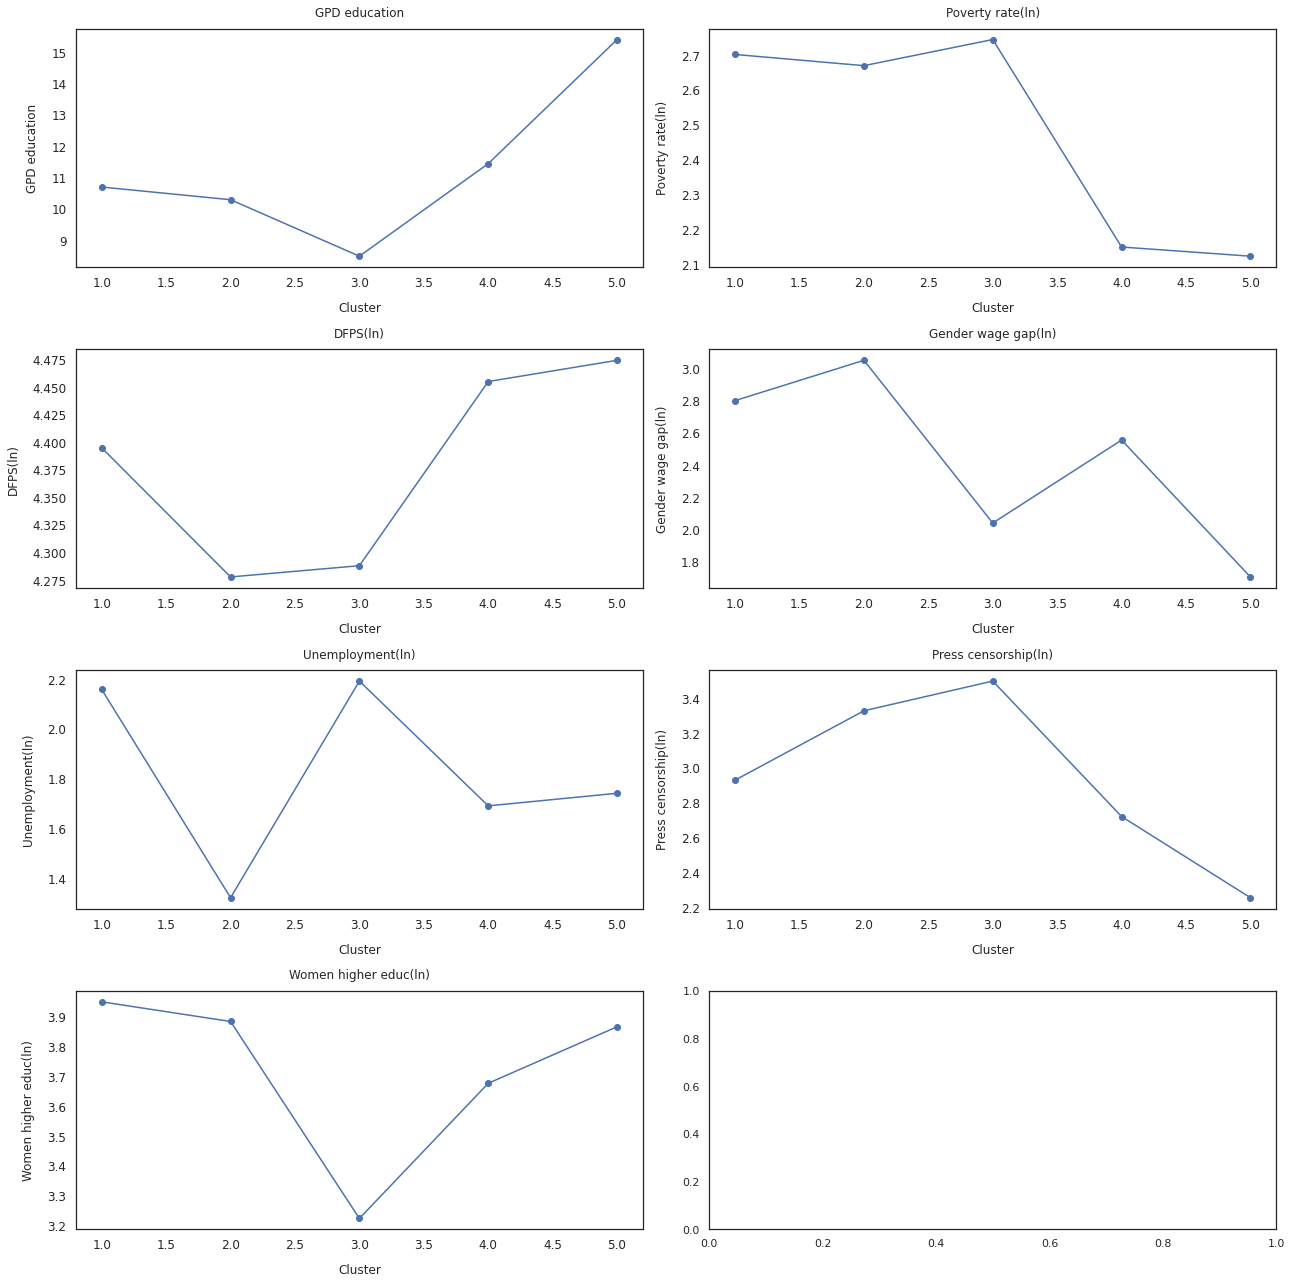

In [304]:
#perform the clustering with the chosen number of clusters
kmeans_method = KMeans(n_clusters = 5,
                        random_state = 42,
                      n_init = 10)
kmeans_method.fit(clustA[columns])

#set the titles
titles = [ 'GPD education',
              "Poverty rate(ln)",
              "DFPS(ln)",
              "Gender wage gap(ln)",
              "Unemployment(ln)",
              "Press censorship(ln)",
              "Women higher educ(ln)" ]
#set the labels
ylabels = [ 'GPD education',
              "Poverty rate(ln)",
              "DFPS(ln)",
              "Gender wage gap(ln)",
              "Unemployment(ln)",
              "Press censorship(ln)",
              "Women higher educ(ln)" ]
#extract the cluster labels and add these back to the data
labels = kmeans_method.labels_
df_merged["labels"] = labels
df_merged["labels"] = df_merged["labels"] + 1

#create a base plot
fig, ax = plt.subplots(4,2, figsize = (18,18))
#flatten the axis
axis = ax.flatten()

#iterate over each column to create plots for each 
for i, col in enumerate(columns):
    #create an empty dictionary
    col_dict = {}
     #iterate over each label
        
    for label in df_merged["labels"].unique().tolist():
        #crete a new dataframe for each label
        label_df = df_merged[df_merged["labels"] == label]
        #add the mean to the dataframe
        col_dict[label] = label_df[col].mean()
    #convert the dictionary to a dataframe
    column_df = pd.DataFrame.from_dict(col_dict, orient = "index")
    #reset the index
    column_df.reset_index(inplace=True)
    #sort the values by the index
    column_df.sort_values(by = "index", inplace=True)

        #plot the results
    axis[i].plot(column_df["index"], column_df[0],
                marker = "o")
    
    #set the plots up
    axis[i].set_title(titles[i], fontsize = 12, pad = 12)
    axis[i].set_xlabel("Cluster", fontsize = 12, labelpad = 12)
    axis[i].set_ylabel(ylabels[i], fontsize =12, labelpad = 12)
    axis[i].tick_params(axis = "both", labelsize = 12)


#set the layout to tight so no overalp
plt.tight_layout()
 

In [305]:
#extract the number of countries within each cluster
df_merged["labels"].value_counts()

4    12
1     7
3     6
5     5
2     4
Name: labels, dtype: int64

In [306]:
clusters = df_merged.reset_index()
clusters.head(2)

,Country,Country Code ISO3,Poverty rate,mDFPS,Gender wage gap,Unemployment,GPD education,Press censorship,Women higher educ,ln_Poverty rate,ln_mDFPS,ln_Gender wage gap,ln_Unemployment,ln_Press censorship,ln_Women higher educ,labels
0,Australia,AUS,12.4,85.6,11.7,6.61,11.537,20.21,54.412212,2.517696,4.449685,2.459589,1.888584,3.006178,3.996589,1
1,Austria,AUT,9.4,88.0,14.9,5.77,12.905,15.78,34.013531,2.240710,4.477337,2.701361,1.752672,2.758743,3.526758,4


In [307]:
groups = clusters.groupby('labels')['Country'].agg(lambda
                             x: list(x))
  
print(groups)

labels
1    [Australia, Canada, Estonia, Latvia, Lithuania...
2                 [Israel, Japan, Korea, Rep., Poland]
3      [Chile, Greece, Hungary, Italy, Mexico, Turkey]
4    [Austria, Czech Republic, Finland, France, Ger...
5      [Belgium, Denmark, New Zealand, Norway, Sweden]
Name: Country, dtype: object


In [308]:
test_dict= groups.to_dict()
test_dict

{1: ['Australia',
  'Canada',
  'Estonia',
  'Latvia',
  'Lithuania',
  'Spain',
  'United States'],
 2: ['Israel', 'Japan', 'Korea, Rep.', 'Poland'],
 3: ['Chile', 'Greece', 'Hungary', 'Italy', 'Mexico', 'Turkey'],
 4: ['Austria',
  'Czech Republic',
  'Finland',
  'France',
  'Germany',
  'Ireland',
  'Netherlands',
  'Portugal',
  'Slovak Republic',
  'Slovenia',
  'Switzerland',
  'United Kingdom'],
 5: ['Belgium', 'Denmark', 'New Zealand', 'Norway', 'Sweden']}

**Cluster 1** : Australia, Canada, Estonia, Latvia, Lithuania, Spain, United States

* medium % GPD for education
* high poverty rates
* med mDFPS
* high gender wage gap
* med press censorship
* high unemployment rates
* high % women with high education
            
            
**Cluster 2**: Israel, Japan, Korea Rep., Poland

* med-low % GPD for education
* high poverty rates
* low mDFPS
* high gender wage gap
* low press censorship
* high unemployment rates
* high % women with high education
            
            
**Cluster 3**: Chile, Greece, Hungary, Italy, Mexico, Turkey

* low % GPD for education
* highest poverty rates
* low mDFPS
* med-low gender wage gap
* high press censorship
* highest unemployment rates
* lowest % women with high education


**Cluster 4** : Austria, Czech Republic, Finland, France, Germany, Ireland, Netherlands, Portugal, Slovak Republic, Slovenia, Switzerland, United Kingdom

* med % GPD for education
* low poverty rates
* high mDFPS
* med gender wage gap
* med-low press censorship
* med unemployment rates
* med % women with high education


**Cluster 5**: Belgium, Denmark, New Zealand, Norway, Sweden

* highest % GPD for education
* lowest poverty rates
* highest mDFPS
* lowest gender wage gap
* lowest press censorship
*  med unemployment rates
* high % women with high education

# MLR

In [317]:
df_stand.head()

,GPD education,ln_Poverty rate,ln_mDFPS,ln_Gender wage gap,ln_Unemployment,ln_Press censorship,ln_Women higher educ
Country,,,,,,,
Australia,0.120780,0.275266,0.494433,0.019238,0.113412,0.209414,0.945803
Austria,0.631856,-0.551750,0.745052,0.451700,-0.200374,-0.300249,-0.580871
Belgium,1.127614,-0.959531,0.958799,-1.813306,-0.106286,-0.768708,0.466981
Canada,0.743934,0.127182,1.038918,0.749588,0.945948,-0.365224,1.595304
Chile,-0.428775,1.128190,0.409330,0.137543,1.393919,0.829567,-1.500653


Text(0.5, 1.0, 'Correlation Matrix')

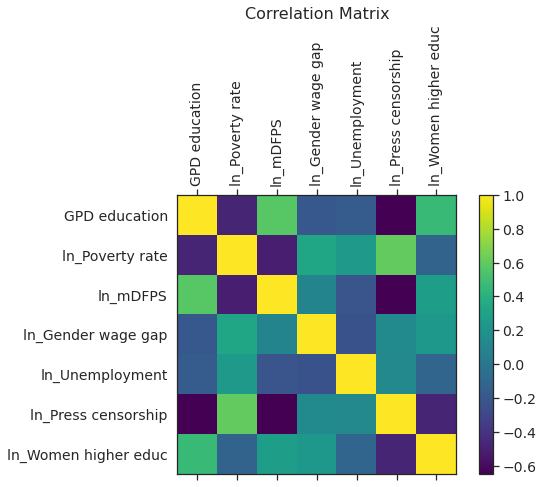

In [318]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(8, 5))
plt.matshow(df_stand.corr(), fignum=f.number, cmap='viridis')
plt.xticks(range(df_stand.shape[1]), df_stand.columns, fontsize=14, rotation=90)
plt.yticks(range(df_stand.shape[1]), df_stand.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [319]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [321]:
# using VIF to drop highly correlated variables

df_predictors_selected_VIF = drop_column_using_vif_(df_stand.drop('ln_Women higher educ', axis=1), thresh=5)
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

The columns remaining after VIF selection are:
Index(['GPD education', 'ln_Poverty rate', 'ln_mDFPS', 'ln_Gender wage gap',
       'ln_Unemployment', 'ln_Press censorship'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [322]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model_MLR = sm.OLS(endog=df_stand[['ln_Women higher educ']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_MLR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ln_Women higher educ   R-squared:                       0.431
Model:                              OLS   Adj. R-squared:                  0.305
Method:                   Least Squares   F-statistic:                     3.411
Date:                  Sun, 09 Jan 2022   Prob (F-statistic):             0.0123
Time:                          19:24:54   Log-Likelihood:                -38.653
No. Observations:                    34   AIC:                             91.31
Df Residuals:                        27   BIC:                             102.0
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.013e-15      0.145   6.98e-15      1.000      -0.298       0.298
GPD education           0.4140      0.203      2.036      0.052      -0.003       0.831
ln_Poverty rate         0.1324      0.208      0.635      0.530      -0.295       0.560
ln_mDFPS               -0.2543      0.215     -1.183      0.247      -0.695       0.187
ln_Gender wage gap      0.3676      0.176      2.093      0.046       0.007       0.728
ln_Unemployment         0.0233      0.160      0.145      0.886      -0.305       0.352
ln_Press censorship    -0.5124      0.228     -2.251      0.033      -0.979      -0.045
==============================================================================
Omnibus:                        1.931   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.775
Skew:                          -0.515   Prob(JB):                        0.412
Kurtosis:                       2.562   Cond. No.                         3.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

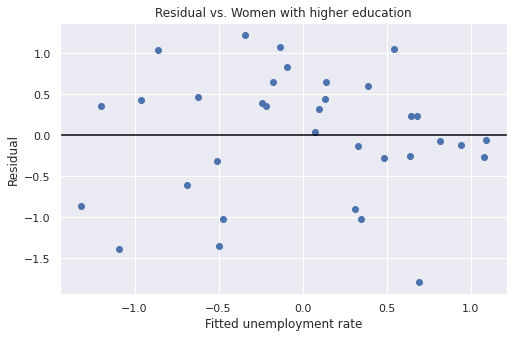

In [326]:
sns.set_theme( style='darkgrid', palette='deep', font_scale=1, color_codes=True, rc=None)
# plot 

f = plt.figure(figsize=(8, 5))
plt.scatter(model_MLR.fittedvalues, model_MLR.resid)
# adding title and labels
plt.xlabel('Fitted unemployment rate')
plt.ylabel('Residual')
plt.title('Residual vs. Women with higher education(ln)')
plt.axhline(y = 0, color = "black", linestyle = "-")
plt.show()

#plt.savefig("residuals.png")

In [325]:
df_drop2= df_stand.drop(['ln_mDFPS','ln_Poverty rate',"ln_Unemployment"], axis=1)

In [328]:

model_2 = sm.OLS(endog=df_drop2[['ln_Women higher educ']], exog=sm.add_constant(df_drop2.drop("ln_Women higher educ", axis=1))).fit()
model_2.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ln_Women higher educ   R-squared:                       0.378
Model:                              OLS   Adj. R-squared:                  0.315
Method:                   Least Squares   F-statistic:                     6.065
Date:                  Sun, 09 Jan 2022   Prob (F-statistic):            0.00236
Time:                          19:27:59   Log-Likelihood:                -40.184
No. Observations:                    34   AIC:                             88.37
Df Residuals:                        30   BIC:                             94.47
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.013e-15      0.144   7.03e-15      1.000      -0.294       0.294
GPD education           0.3174      0.190      1.668      0.106      -0.071       0.706
ln_Gender wage gap      0.3352      0.147      2.283      0.030       0.035       0.635
ln_Press censorship    -0.3223      0.188     -1.710      0.098      -0.707       0.063
==============================================================================
Omnibus:                        2.713   Durbin-Watson:                   2.194
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                2.471
Skew:                          -0.619   Prob(JB):                        0.291
Kurtosis:                       2.543   Cond. No.                         2.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""